<a href="https://colab.research.google.com/github/NikosEvan/deep-learning-project/blob/main/Copy_of_MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [143]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [144]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [145]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [146]:
rows = 5
digits_per_row = 5

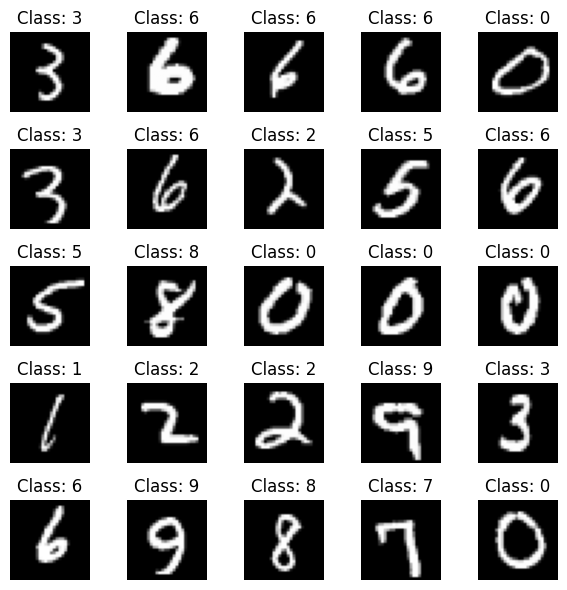

In [147]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [148]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [149]:
activation = 'elu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.009
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 13

In [150]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),

    # tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    # tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    # tf.keras.layers.Dense(units=128, activation=activation, name='hidden-3'),

    tf.keras.layers.Dense(units=512, name='hidden-1'),
    tf.keras.layers.BatchNormalization(name='bn-1'),
    tf.keras.layers.Activation(activation, name='act-1'),

    tf.keras.layers.Dense(units=256, name='hidden-2'),
    tf.keras.layers.BatchNormalization(name='bn-2'),
    tf.keras.layers.Activation(activation, name='act-2'),

    tf.keras.layers.Dense(units=128, name='hidden-3'),
    tf.keras.layers.BatchNormalization(name='bn-3'),
    tf.keras.layers.Activation(activation, name='act-3'),

    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn-1 (BatchNormalization)       │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act-1 (Activation)              │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn-2 (BatchNormalization)       │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act-2 (Activation)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-3 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn-3 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act-3 (Activation)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [151]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8531 - loss: 0.4972 - val_accuracy: 0.9480 - val_loss: 0.1796
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9435 - loss: 0.1996 - val_accuracy: 0.9622 - val_loss: 0.1318
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9598 - loss: 0.1429 - val_accuracy: 0.9690 - val_loss: 0.1093
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9713 - loss: 0.1089 - val_accuracy: 0.9716 - val_loss: 0.0966
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9784 - loss: 0.0848 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9842 - loss: 0.0666 - val_accuracy: 0.9744 - val_loss: 0.0844
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9894 - loss: 0.0522 - val_accuracy: 0.9753 - val_loss: 0.0816
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9928 - loss: 0

# Display Loss and Accuracy per Training Epoch

In [152]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

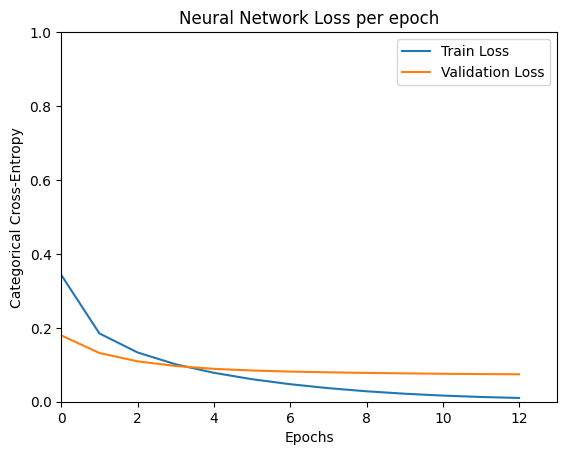

In [153]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

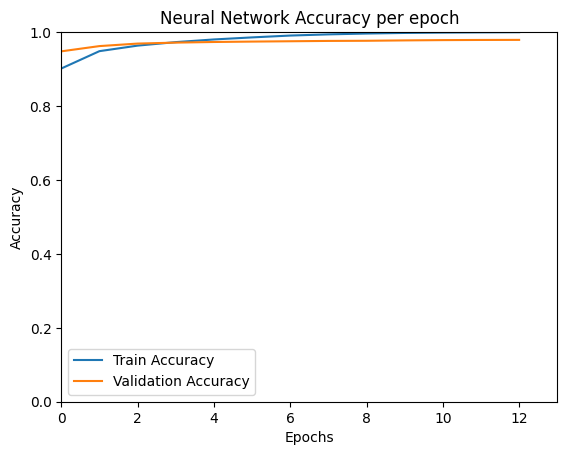

In [154]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [155]:
# Οι αλλαγες που εκανα αρχικα ηταν (σχεδον) τυχαιες και στη συνεχεια βοηθηθηκα (για το ποιες αλλαγες φερνουν συνηθως θετικα αποτελεσματα) απο google και chatgpt.

data = [
    {"Hidden Layers": "2", "Hidden Units": 256, "Learning rate": 0.001, "Activation": "tanh", "Epochs": 10,  "Accuracy": 0.9358 },
    {"Hidden Layers": "4", "Hidden Units": 128, "Learning rate": 0.001, "Activation": "tanh", "Epochs": 10, "Accuracy": 0.9269 },
    {"Hidden Layers": "2", "Hidden Units": 256, "Learning rate": 0.001, "Activation": "sigmoid", "Epochs": 10,  "Accuracy": 0.8933 },
    {"Hidden Layers": "2", "Hidden Units": 256, "Learning rate": 0.001, "Activation": "elu", "Epochs": 15,  "Accuracy": 0.9588 },
    {"Hidden Layers": "2", "Hidden Units": 256, "Learning rate": 0.001, "Activation": "elu", "Epochs": 10,  "Accuracy": 0.9556 },
    {"Hidden Layers": "2", "Hidden Units": 256, "Learning rate": 0.0005, "Activation": "elu", "Epochs": 10,  "Accuracy": 0.9358 },
    {"Hidden Layers": "3", "Hidden Units": [512, 256, 128], "Learning rate": 0.001, "Activation": "elu", "Epochs": 10,  "Accuracy": 0.9588 },
    {"Hidden Layers": "3", "Hidden Units": [512, 256, 128], "Learning rate": 0.002, "Activation": "elu", "Epochs": 10,  "Accuracy": 0.9639 },
    {"Hidden Layers": "3", "Hidden Units": [512, 256, 128], "Learning rate": 0.003, "Activation": "elu", "Epochs": 10,  "Accuracy": 0.9641 }
]

df = pd.DataFrame(data)
df

,Hidden Layers,Hidden Units,Learning rate,Activation,Epochs,Accuracy
0,2,256,0.0010,tanh,10,0.9358
1,4,128,0.0010,tanh,10,0.9269
2,2,256,0.0010,sigmoid,10,0.8933
3,2,256,0.0010,elu,15,0.9588
4,2,256,0.0010,elu,10,0.9556
5,2,256,0.0005,elu,10,0.9358
6,3,"[512, 256, 128]",0.0010,elu,10,0.9588
7,3,"[512, 256, 128]",0.0020,elu,10,0.9639
8,3,"[512, 256, 128]",0.0030,elu,10,0.9641


## 2. Validation: Show 1 misclassified digit from each class.

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

Για τη βελτιωση του accuracy του νευρωνικου δικτυου εκανα κανονικοποιηση (normalization) των layers των νευρωνων πριν "περασουν" απο τη συναρτηση κανονικοποιησης. Πετυχα val_accuracy: 0.9719. Αλλαξα και learning rate σε 0.001 και epochs σε 13 και πετυχα val_accuracy:  0.9790

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [156]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
